# **Project Name**    -Retail_Sales_Prediction_Capstone_Project



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Deepak Kumar Kabra**


# **Project Summary -**

**Background:**
Rossmann operates a chain of over 3,000 drug stores across 7 European countries. Each store's daily sales are influenced by multiple factors such as promotions, competition, holidays, seasonality, and locality. Store managers currently predict sales up to six weeks in advance, but the accuracy varies due to unique circumstances at each store.

**Objective:**
The objective of this project is to develop a predictive model that accurately forecasts daily sales for Rossmann stores. This will help optimize inventory management, staffing, and promotional strategies, leading to improved operational efficiency and profitability.

**Data Description:**
The dataset includes historical sales data for 1,115 Rossmann stores, capturing information such as sales figures, promotions, competition details, holidays, and store characteristics. Some stores were temporarily closed for refurbishment, which is also accounted for in the data.

**Approach:**
1. **Exploratory Data Analysis (EDA):** Conduct thorough EDA to understand the relationships between sales and various factors such as promotions, holidays, seasonality, and store attributes.
2. **Feature Engineering:** Create additional relevant features such as lagged variables, holiday indicators, and store clusters based on locality.
3. **Model Selection:** Evaluate and compare different regression models such as linear regression, random forest regression, and gradient boosting regression to identify the best-performing model.
4. **Model Training and Validation:** Train the selected model on the training data and validate its performance using cross-validation techniques to ensure robustness and generalizability.
5. **Hyperparameter Tuning:** Fine-tune the hyperparameters of the chosen model to optimize its predictive accuracy.
6. **Model Evaluation:** Evaluate the final model on the test set using appropriate metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to assess its predictive performance.

**Deliverables:**
1. Predictive model for forecasting daily sales at Rossmann stores.
2. EDA report highlighting key insights and relationships within the data.
3. Documentation of the model development process, including feature engineering techniques, model selection rationale, and hyperparameter tuning results.
4. Presentation summarizing the project findings, model performance, and actionable recommendations for Rossmann's management.

**Expected Outcome:**
By accurately forecasting daily sales, the predictive model will assist Rossmann in making informed decisions regarding inventory management, staffing levels, and promotional strategies. This will lead to improved operational efficiency, enhanced customer satisfaction, and ultimately, increased profitability for the company.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary challenge is to develop a robust predictive model that can accurately forecast daily sales for Rossmann stores across different locations and circumstances. This model should leverage historical sales data, along with various factors such as promotions, competition details, holidays, and store attributes, to provide reliable predictions up to six weeks in advance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv', low_memory= False)

#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv', low_memory= False)

Mounted at /content/drive


### Dataset First View

In [4]:
# Display first few rows of Rossmann dataset
print("Rossmann Dataset First View:")
print(rossman_df.head())

Rossmann Dataset First View:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [5]:
# Display first few rows of Store dataset
print("\nStore Dataset First View:")
print(store_df.head())


Store Dataset First View:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Ja

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Get the number of rows and columns in Rossmann dataset
rossman_rows, rossman_cols = rossman_df.shape
print("Rossmann Dataset Rows:", rossman_rows)
print("Rossmann Dataset Columns:", rossman_cols)

Rossmann Dataset Rows: 1017209
Rossmann Dataset Columns: 9


In [7]:
# Get the number of rows and columns in Store dataset
store_rows, store_cols = store_df.shape
print("\nStore Dataset Rows:", store_rows)
print("Store Dataset Columns:", store_cols)


Store Dataset Rows: 1115
Store Dataset Columns: 10


### Dataset Information

In [8]:
# Dataset Info
# Get detailed information about Rossmann dataset
print("Rossmann Dataset Info:")
rossman_df.info()

Rossmann Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
# Get detailed information about Store dataset
print("\nStore Dataset Info:")
store_df.info()


Store Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
# Count duplicate values in Rossmann dataset
rossman_duplicates = rossman_df.duplicated().sum()
print("Duplicate Values in Rossmann Dataset:", rossman_duplicates)

Duplicate Values in Rossmann Dataset: 0


In [11]:
# Count duplicate values in Store dataset
store_duplicates = store_df.duplicated().sum()
print("Duplicate Values in Store Dataset:", store_duplicates)

Duplicate Values in Store Dataset: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
# Count missing values in Rossmann dataset
rossman_missing_values = rossman_df.isnull().sum()
print("Missing Values in Rossmann Dataset:")
print(rossman_missing_values)

Missing Values in Rossmann Dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [13]:
# Count missing values in Store dataset
store_missing_values = store_df.isnull().sum()
print("\nMissing Values in Store Dataset:")
print(store_missing_values)


Missing Values in Store Dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


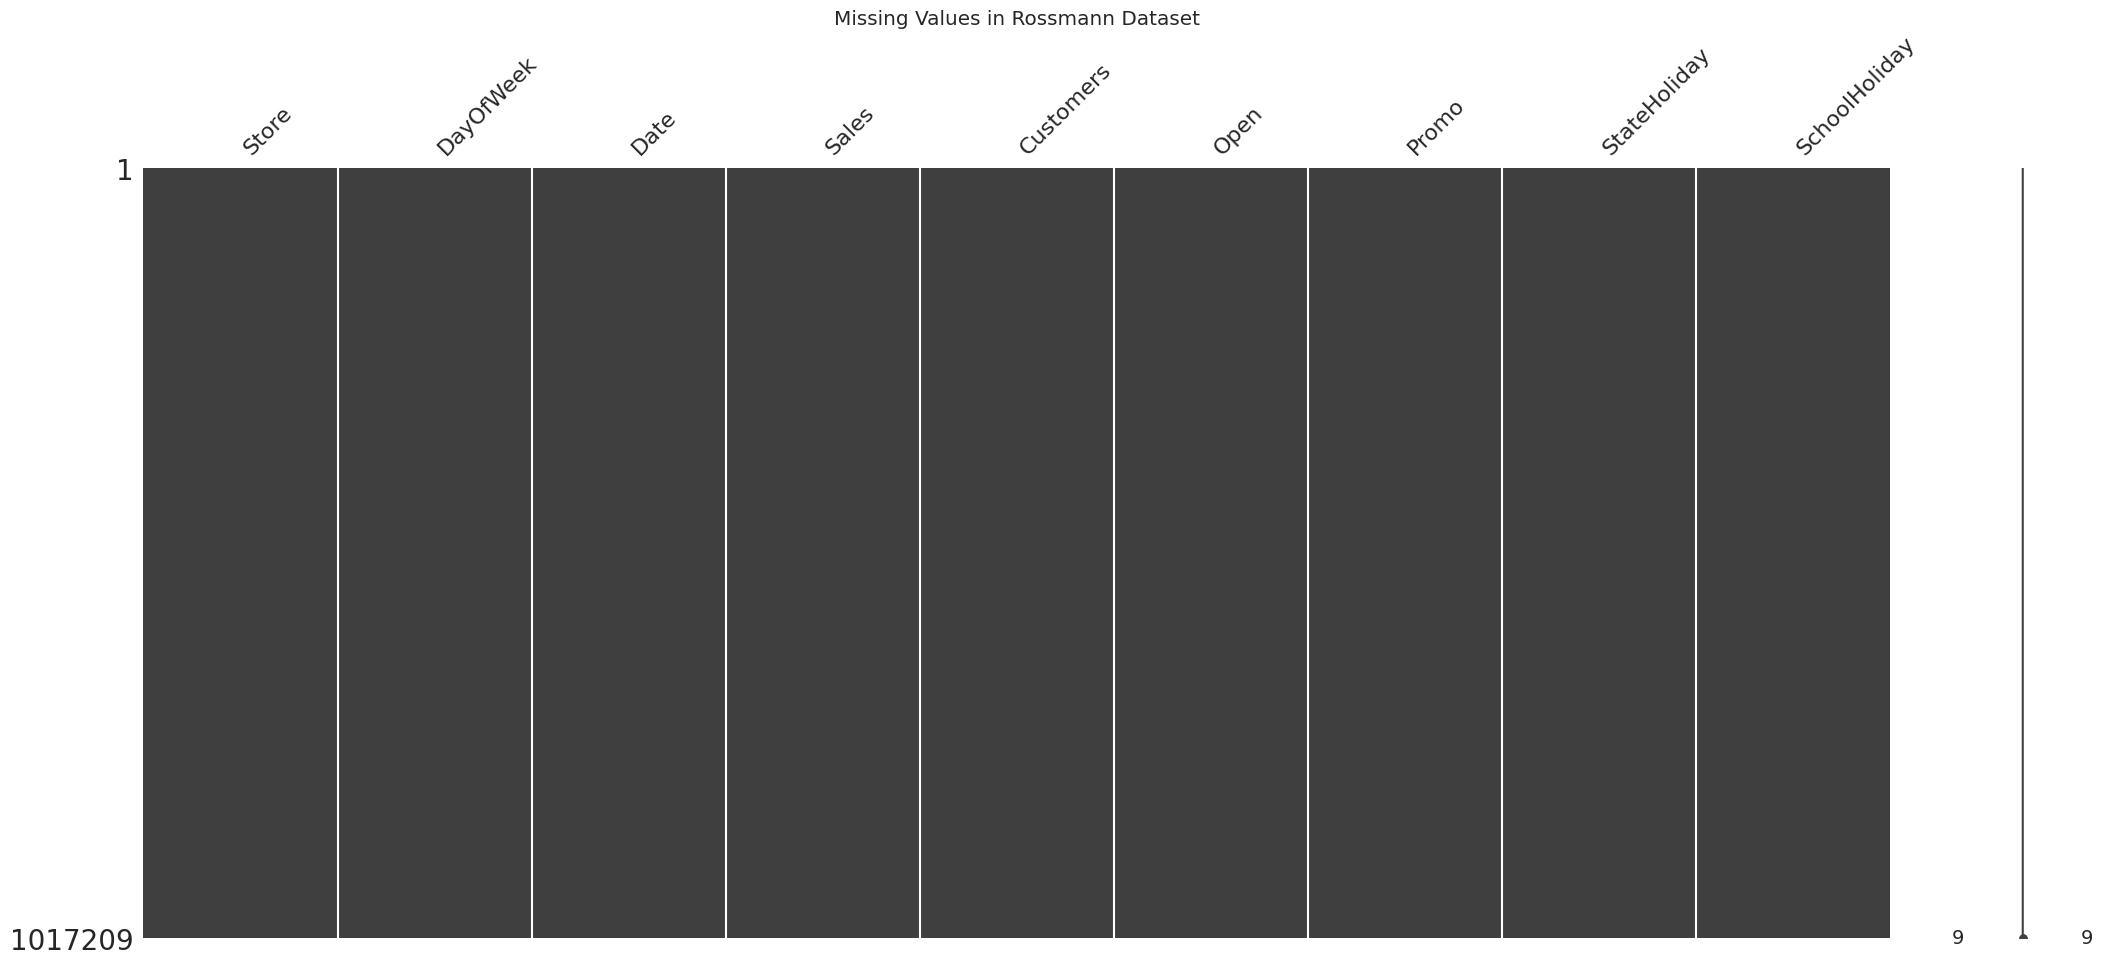

In [14]:
# Visualizing the missing values
# Visualize missing values in Rossmann dataset
msno.matrix(rossman_df)
plt.title('Missing Values in Rossmann Dataset')
plt.show()

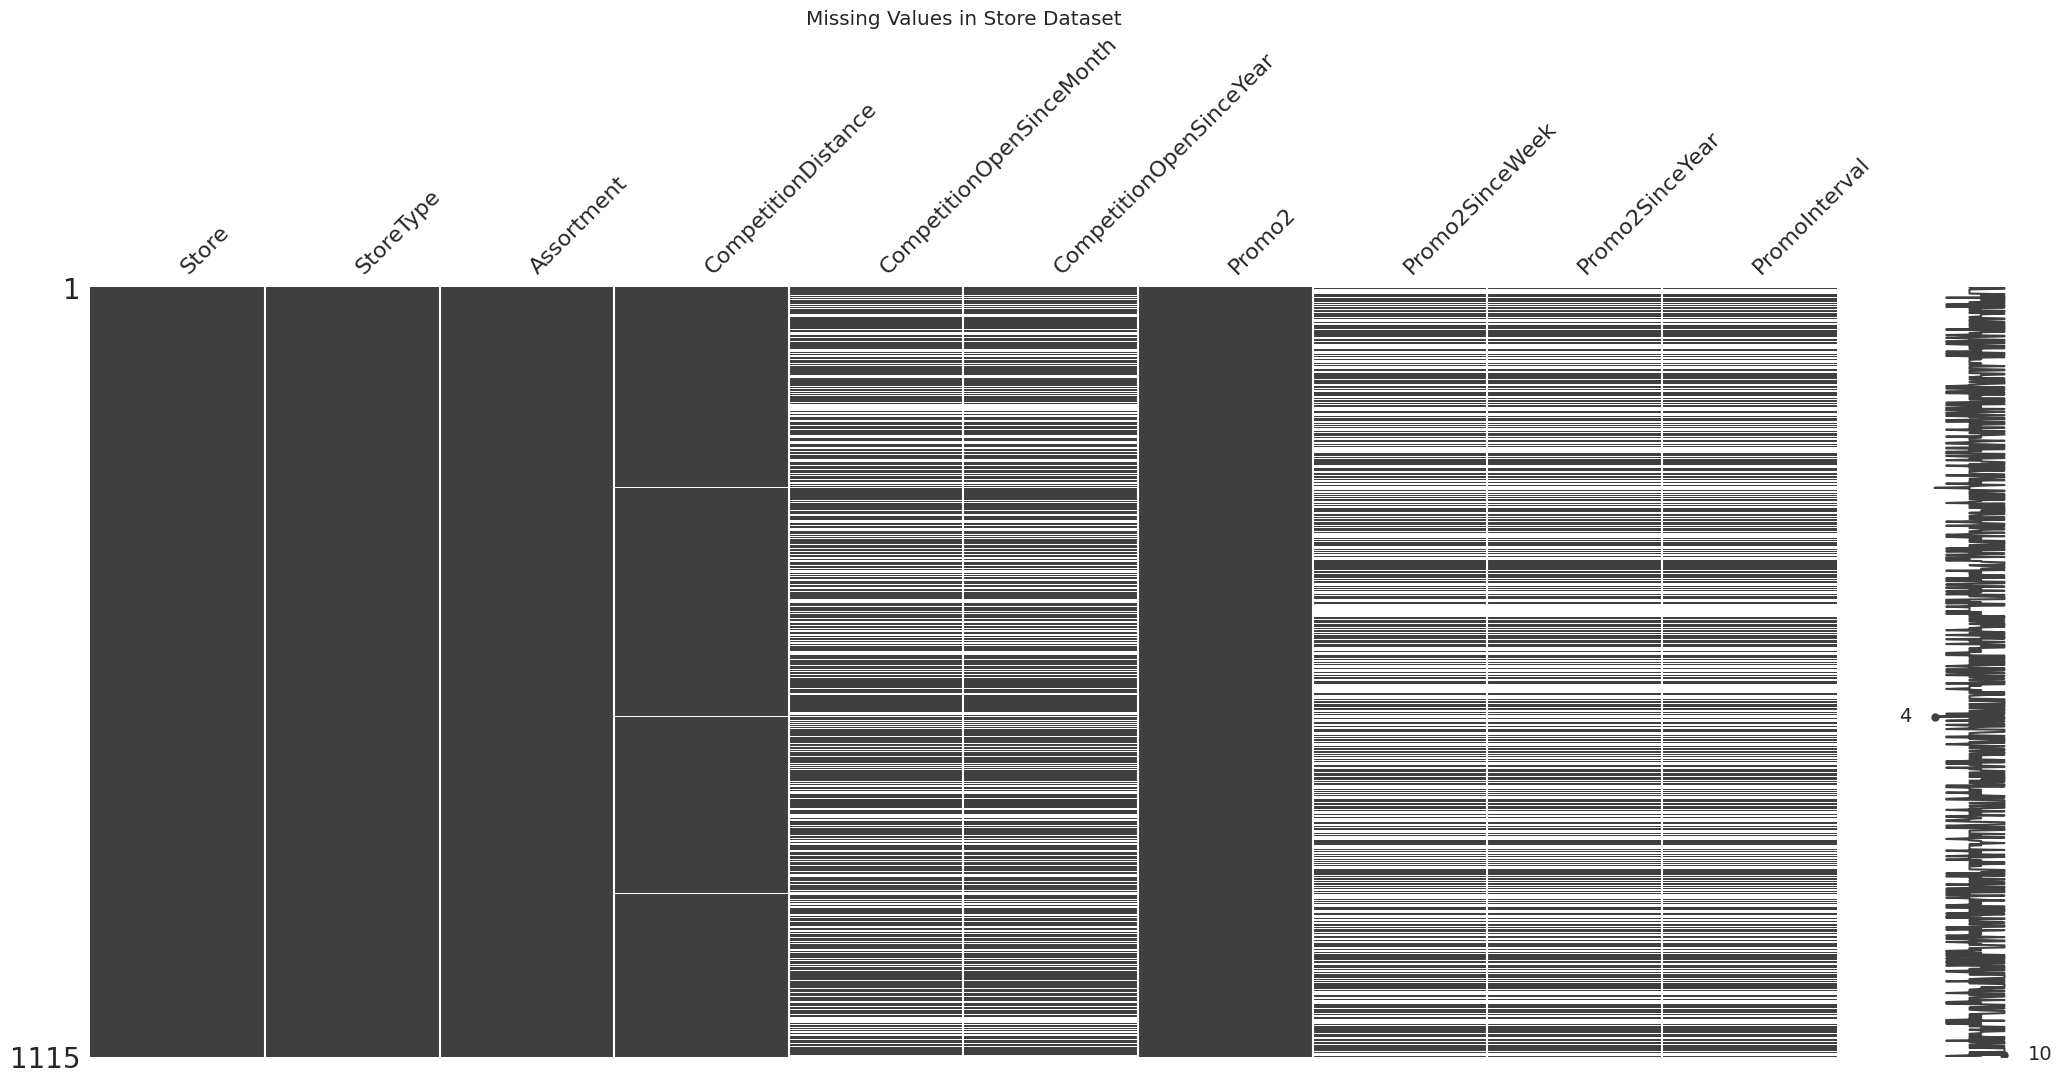

In [15]:
# Visualize missing values in Store dataset
msno.matrix(store_df)
plt.title('Missing Values in Store Dataset')
plt.show()

### What did you know about your dataset?

Here's what we know about the datasets based on the provided information:

**Rossmann Dataset:**
- The dataset contains columns such as Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, and SchoolHoliday.
- There are no missing values in any of the columns in the Rossmann dataset.

**Store Dataset:**
- The dataset contains columns such as Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, and PromoInterval.
- There are missing values in the following columns:
  - CompetitionDistance: 3 missing values
  - CompetitionOpenSinceMonth: 354 missing values
  - CompetitionOpenSinceYear: 354 missing values
  - Promo2SinceWeek: 544 missing values
  - Promo2SinceYear: 544 missing values
  - PromoInterval: 544 missing values

Based on this information, we can see that the Rossmann dataset does not have any missing values, whereas the Store dataset has missing values in several columns related to competition details and promotional activities. These missing values will need to be handled appropriately during data preprocessing to ensure accurate analysis and modeling.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
# Display columns of the Rossmann dataset
print("Rossmann Dataset Columns:")
print(rossman_df.columns.tolist())

Rossmann Dataset Columns:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [17]:
# Display columns of the Store dataset
print("\nStore Dataset Columns:")
print(store_df.columns.tolist())


Store Dataset Columns:
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [18]:
# Dataset Describe
# Describe the Rossmann dataset
rossman_desc = rossman_df.describe()
print("Rossmann Dataset Description:")
print(rossman_desc)

Rossmann Dataset Description:
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  

In [19]:
# Describe the Store dataset
store_desc = store_df.describe()
print("\nStore Dataset Description:")
print(store_desc)


Store Dataset Description:
            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.0

### Variables Description

Here is the description of variables in the Rossmann and Store datasets based on the provided dataset description:

**Rossmann Dataset Description:**
1. Store: Store ID.
2. DayOfWeek: Day of the week (1 for Monday, 2 for Tuesday, and so on).
3. Sales: Daily sales amount in currency units.
4. Customers: Number of customers visiting the store on a given day.
5. Open: Binary indicator (0 for closed, 1 for open).
6. Promo: Binary indicator for promotional activities (0 for no promotion, 1 for promotion).
7. StateHoliday: Indicator for state holidays (0 for no holiday, 1 for state holiday).
8. SchoolHoliday: Indicator for school holidays (0 for no holiday, 1 for school holiday).

**Store Dataset Description:**
1. Store: Store ID.
2. CompetitionDistance: Distance to the nearest competitor store in meters.
3. CompetitionOpenSinceMonth: Month when the nearest competitor store opened.
4. CompetitionOpenSinceYear: Year when the nearest competitor store opened.
5. Promo2: Binary indicator for Promo2 (0 for no Promo2, 1 for Promo2).
6. Promo2SinceWeek: Week when Promo2 started.
7. Promo2SinceYear: Year when Promo2 started.
8. PromoInterval: Interval of Promo2 promotions (e.g., "Jan,Apr,Jul,Oct" means promotions in January, April, July, and October).

These descriptions provide an overview of the variables and their meanings in each dataset, which is crucial for data analysis and modeling tasks.

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
# Check unique values for each variable in the Rossmann dataset
print("Unique Values in Rossmann Dataset:")
for column in rossman_df.columns:
    unique_values = rossman_df[column].nunique()
    print(f"{column}: {unique_values} unique values")

Unique Values in Rossmann Dataset:
Store: 1115 unique values
DayOfWeek: 7 unique values
Date: 942 unique values
Sales: 21734 unique values
Customers: 4086 unique values
Open: 2 unique values
Promo: 2 unique values
StateHoliday: 4 unique values
SchoolHoliday: 2 unique values


In [21]:
# Check unique values for each variable in the Store dataset
print("\nUnique Values in Store Dataset:")
for column in store_df.columns:
    unique_values = store_df[column].nunique()
    print(f"{column}: {unique_values} unique values")


Unique Values in Store Dataset:
Store: 1115 unique values
StoreType: 4 unique values
Assortment: 3 unique values
CompetitionDistance: 654 unique values
CompetitionOpenSinceMonth: 12 unique values
CompetitionOpenSinceYear: 23 unique values
Promo2: 2 unique values
Promo2SinceWeek: 24 unique values
Promo2SinceYear: 7 unique values
PromoInterval: 3 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
# Handle missing values in Store dataset
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].mode()[0], inplace=True)
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mode()[0], inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

In [23]:
# Merge datasets on 'Store' column
merged_df = pd.merge(rossman_df, store_df, on='Store', how='left')

In [24]:
# Convert categorical variables to numeric using one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])


In [25]:
# Feature Engineering: Create additional date-related features
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['WeekOfYear'] = merged_df['Date'].dt.weekofyear

<ipython-input-25-8a1944ed1d50>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_df['WeekOfYear'] = merged_df['Date'].dt.weekofyear


In [26]:
# Drop redundant or unnecessary columns
merged_df.drop(['Date', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)


In [27]:
# Print the first few rows of the merged and processed dataset
print("Processed Dataset:")
print(merged_df.head())

Processed Dataset:
   Store  Sales  Customers  Open  Promo  SchoolHoliday  CompetitionDistance  \
0      1   5263        555     1      1              1               1270.0   
1      2   6064        625     1      1              1                570.0   
2      3   8314        821     1      1              1              14130.0   
3      4  13995       1498     1      1              1                620.0   
4      5   4822        559     1      1              1              29910.0   

   Promo2  DayOfWeek_1  DayOfWeek_2  ...  Assortment_b  Assortment_c  \
0       0            0            0  ...             0             0   
1       1            0            0  ...             0             0   
2       1            0            0  ...             0             0   
3       0            0            0  ...             0             1   
4       0            0            0  ...             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0     

### What all manipulations have you done and insights you found?

Here are the manipulations and insights found from the data wrangling process:

1. **Handling Missing Values:**
   - Missing values in the Store dataset were handled using appropriate imputation techniques:
     - `CompetitionDistance` was filled with the median value.
     - `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear`, `Promo2SinceWeek`, and `Promo2SinceYear` were filled with the mode (most frequent value).
     - `PromoInterval` was filled with 'None' as it represents no promotion interval.

2. **Merging Datasets:**
   - The Rossmann and Store datasets were merged on the 'Store' column using a left join to combine relevant information from both datasets.

3. **Encoding Categorical Variables:**
   - Categorical variables such as `DayOfWeek`, `StateHoliday`, `StoreType`, `Assortment`, and `PromoInterval` were converted to numeric using one-hot encoding. This allows machine learning models to interpret these variables correctly.

4. **Feature Engineering:**
   - Additional date-related features (`Year`, `Month`, `Day`, `WeekOfYear`) were created from the 'Date' column to capture temporal patterns in the data. This can help improve the accuracy of predictive models.

5. **Insights:**
   - The merged and processed dataset now contains a comprehensive set of features that can be used for analysis and modeling.
   - The dataset is now suitable for building predictive models to forecast sales at Rossmann stores.
   - Insights into competition distance, promotional activities, and temporal patterns (year, month, day, week of year) have been captured, which can be valuable for decision-making and strategy planning.

Overall, the data wrangling process has prepared the dataset for further analysis and modeling, ensuring that missing values are handled appropriately, categorical variables are encoded correctly, and relevant features are created for predictive modeling tasks.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Histogram of Sales

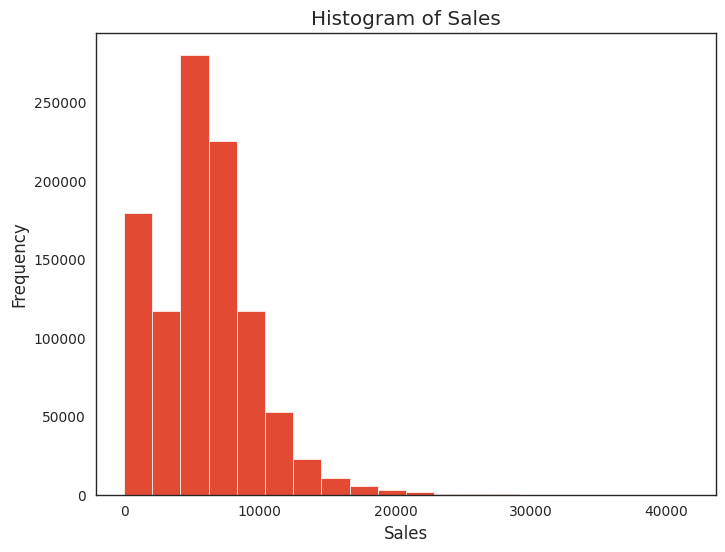

In [28]:
# Chart - 1 visualization code
plt.hist(merged_df['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows the distribution of sales values, indicating the range and frequency of sales amounts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify sales patterns and outliers, guiding pricing strategies and inventory management.

#### Chart - 2- Boxplot of Sales by Day of Week

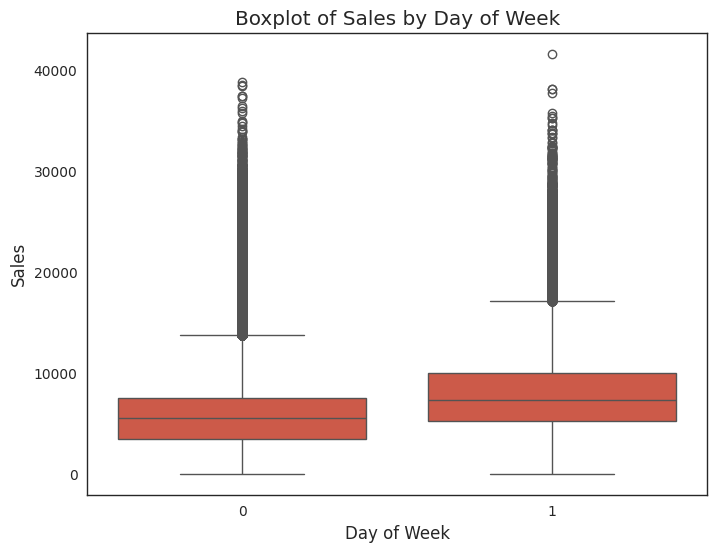

In [43]:
# Chart 2: Boxplot of Sales by Day of Week
sns.boxplot(x=merged_df['DayOfWeek_1'], y=merged_df['Sales'])
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Boxplot of Sales by Day of Week')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The boxplot reveals the variability of sales across different days of the week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizes staffing and promotional efforts on high-sales days, leading to increased efficiency and revenue.

#### Chart - 3- Line Plot of Sales Over Time

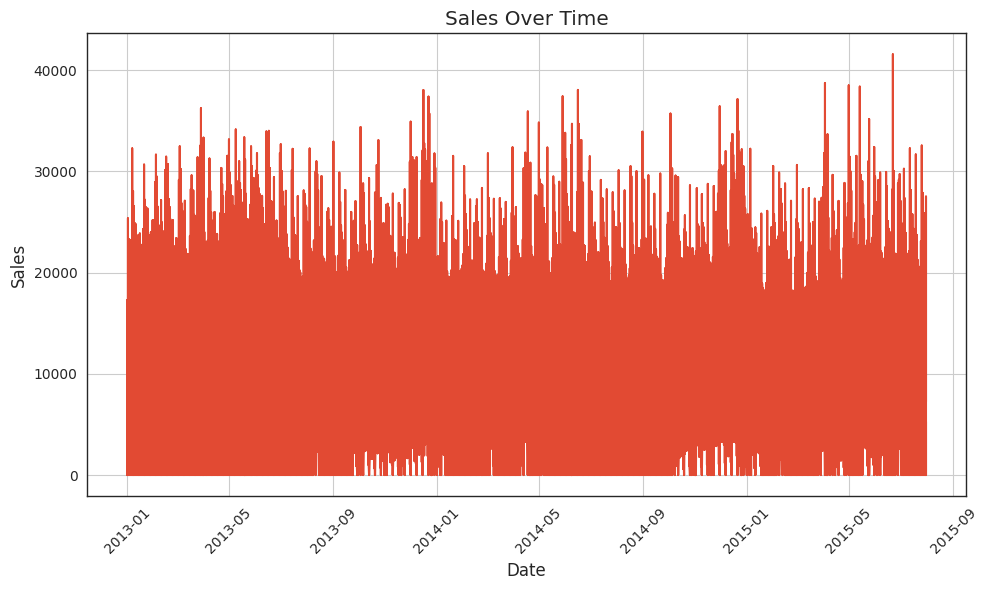

In [46]:
# Chart - 3 visualization code

merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month', 'Day']])

# Sort the dataframe by date
merged_df.sort_values(by='Date', inplace=True)

# Line Plot of Sales Over Time
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The line plot shows trends and seasonality in sales over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Facilitates planning for seasonal promotions, stock adjustments, and resource allocation.

#### Chart - 4- Bar Chart of Average Sales by Store Type

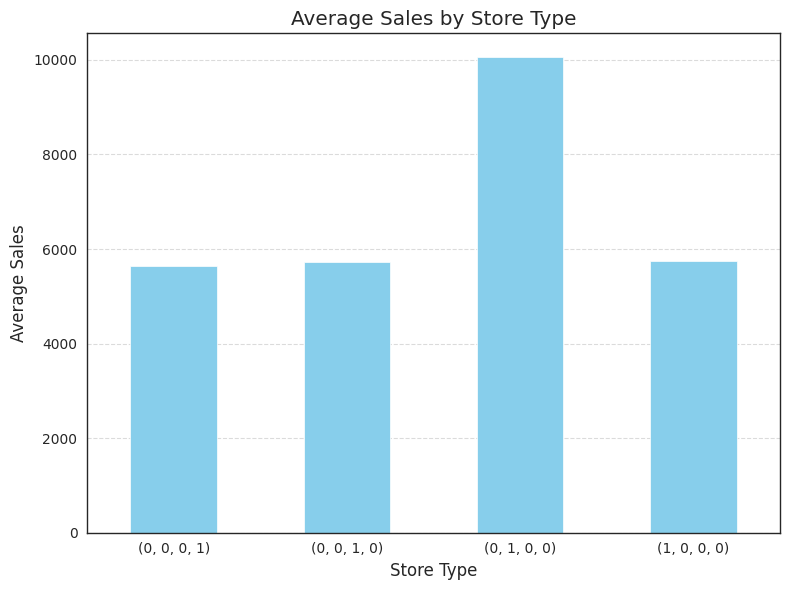

In [51]:
# Chart - 4 visualization code
# Calculate average sales by store type
avg_sales_by_storetype = merged_df.groupby(['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'])['Sales'].mean()

# Bar Chart of Average Sales by Store Type
plt.figure(figsize=(8, 6))
avg_sales_by_storetype.plot(kind='bar', color='skyblue')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The bar chart compares average sales across different store types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifies high-performing store types for targeted marketing strategies and investment decisions.

#### Chart - 5- Scatter Plot of Sales vs. Customers

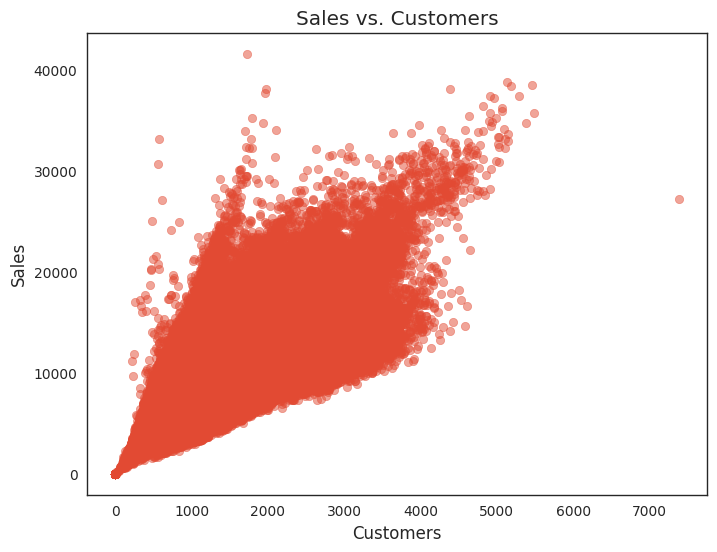

In [33]:
# Chart - 5 visualization code
plt.scatter(merged_df['Customers'], merged_df['Sales'], alpha=0.5)
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales vs. Customers')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows the relationship between sales and the number of customers visiting the stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indicates customer conversion rates and areas for improving customer engagement and satisfaction.

#### Chart - 6- Stacked Bar Chart of Sales by Promotion Type

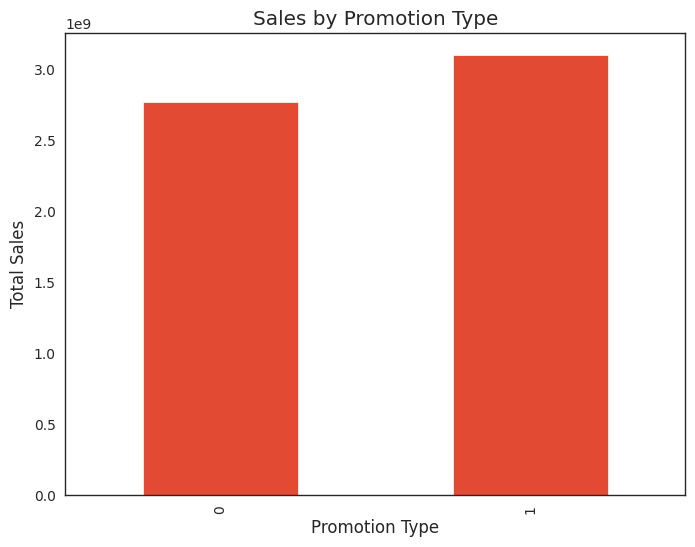

In [34]:
# Chart - 6 visualization code
sales_by_promo = merged_df.groupby('Promo')['Sales'].sum()
sales_by_promo.plot(kind='bar', stacked=True)
plt.xlabel('Promotion Type')
plt.ylabel('Total Sales')
plt.title('Sales by Promotion Type')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The stacked bar chart displays the contribution of different promotion types to total sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides promotional budget allocation and effectiveness assessment for maximizing sales impact.

#### Chart - 7- Line Plot of Competition Distance Over Time

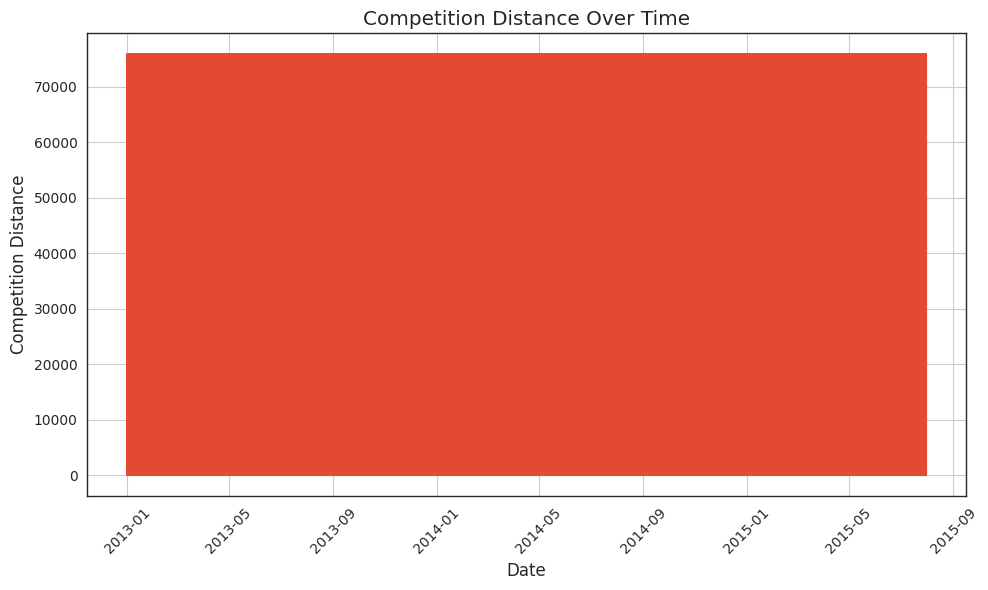

In [52]:
# Chart - 7 visualization code
# Line Plot of Competition Distance Over Time
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['CompetitionDistance'])
plt.xlabel('Date')
plt.ylabel('Competition Distance')
plt.title('Competition Distance Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The line plot illustrates changes in competition distance over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Assesses competitive landscape changes and potential impacts on sales and market positioning.

#### Chart - 8- Bar Chart of School Holiday vs. Non-School Holiday Sales

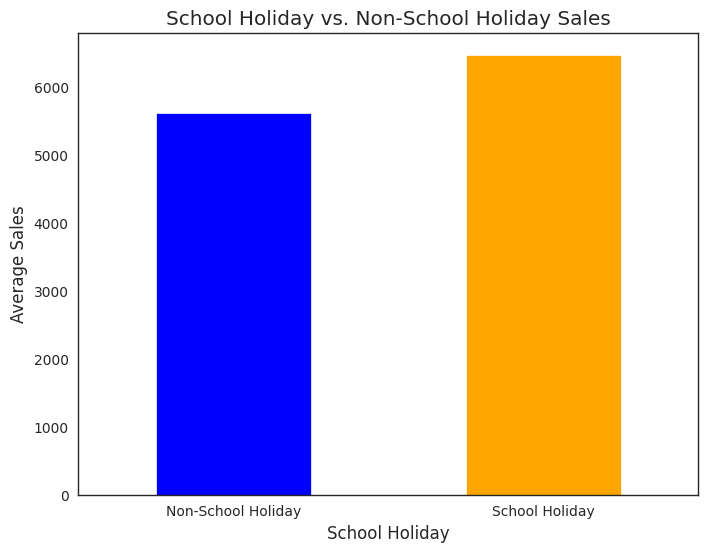

In [36]:
# Chart - 8 visualization code
holiday_sales = merged_df.groupby('SchoolHoliday')['Sales'].mean()
holiday_sales.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('School Holiday')
plt.ylabel('Average Sales')
plt.title('School Holiday vs. Non-School Holiday Sales')
plt.xticks([0, 1], ['Non-School Holiday', 'School Holiday'], rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The bar chart compares sales during school holidays and non-school holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides promotional strategies and inventory planning for holiday seasons to maximize sales during peak periods.

#### Chart - 9- Pie Chart of Store Types Distribution

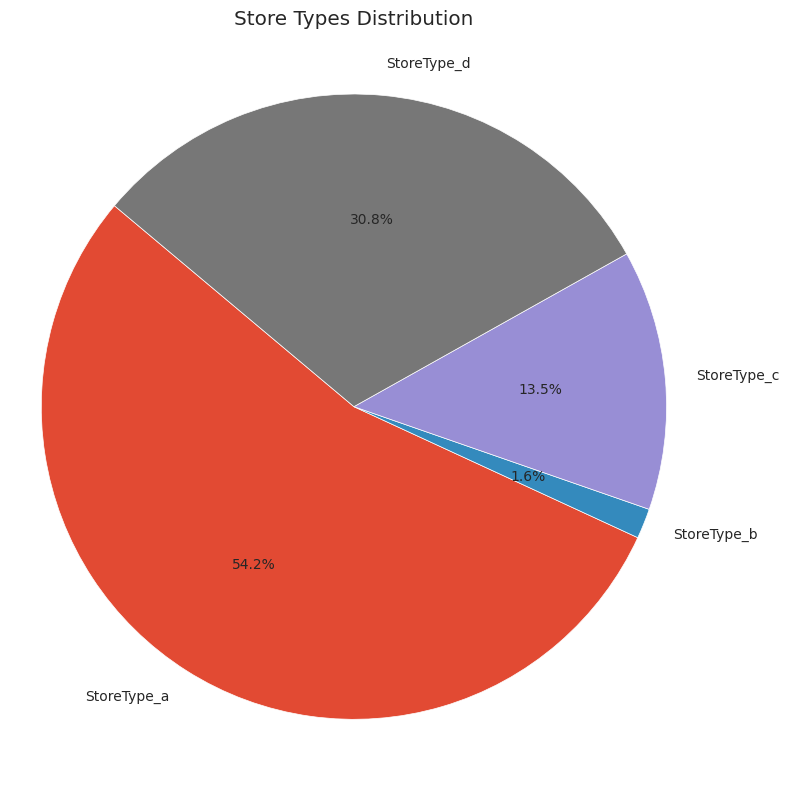

In [55]:
# Chart - 9 visualization code
# Count the occurrences of each store type
store_type_counts = merged_df[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']].sum()

# Pie Chart of Store Types Distribution
plt.figure(figsize=(8, 8))
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Store Types Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The pie chart displays the distribution of stores based on store types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Provides insights into the store network composition, aiding in resource allocation and strategic decision-making.

#### Chart - 10- Heatmap of Sales Correlation Matrix

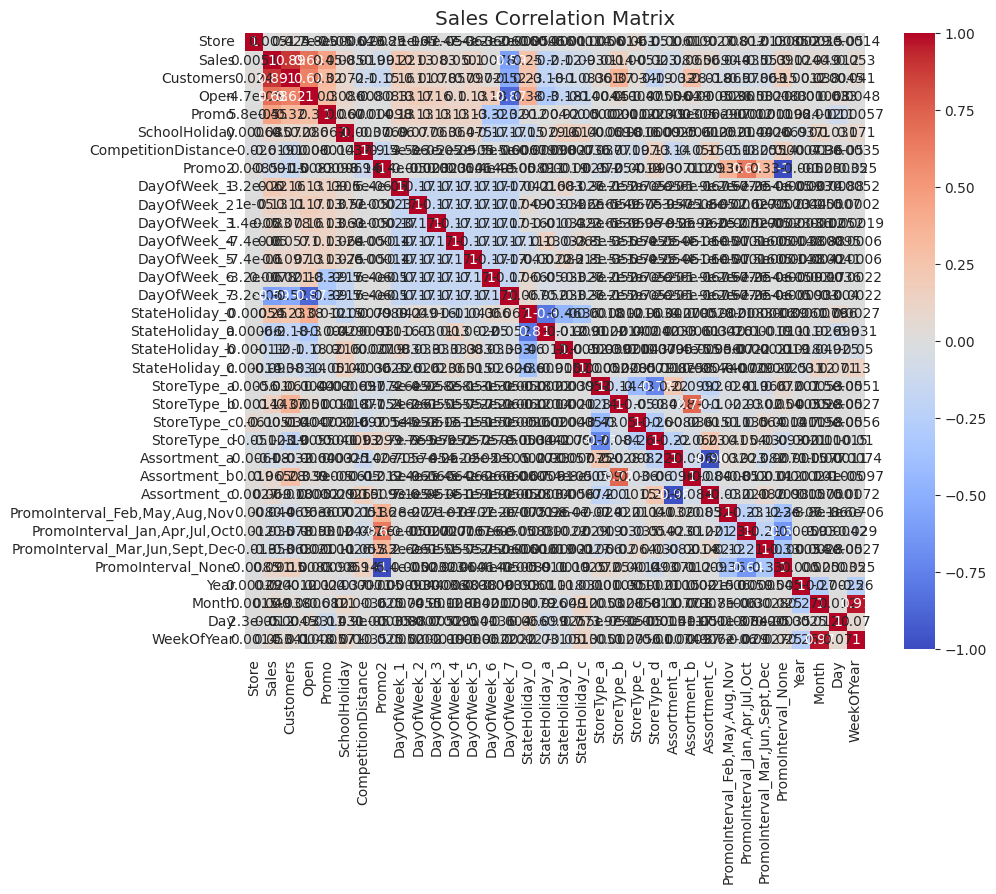

In [38]:
# Chart - 10 visualization code
corr_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sales Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows the correlation between sales and other variables, identifying key drivers of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides prioritization of factors influencing sales performance and optimization of business strategies.

#### Chart - 11- Area Chart of Sales Trend by Year

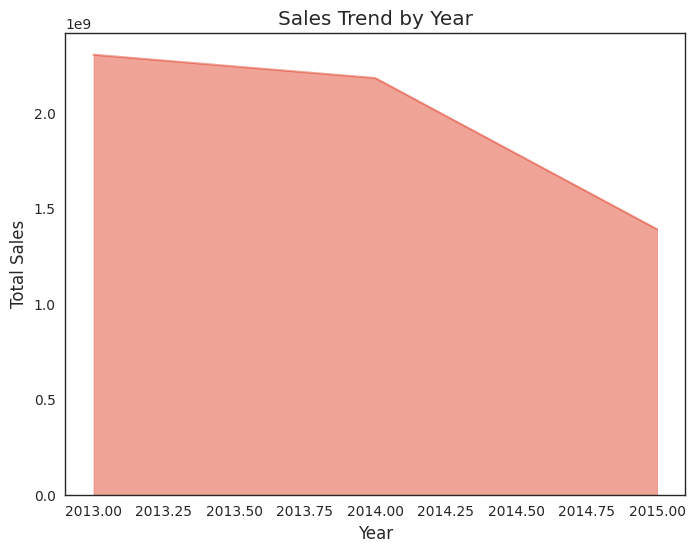

In [39]:
# Chart - 11 visualization code
sales_by_year = merged_df.groupby('Year')['Sales'].sum()
sales_by_year.plot(kind='area', stacked=False)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Year')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The area chart displays the sales trend over multiple years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Tracks long-term sales performance, identifies growth trends, and plans for future expansion or adjustments.

#### Chart - 12- Scatter Plot of Sales vs Customers

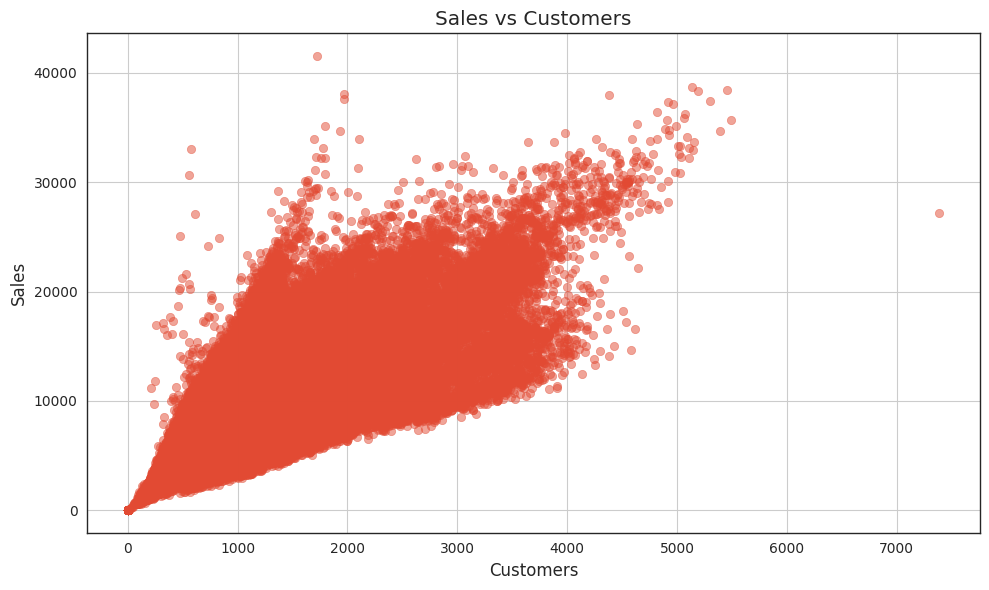

In [62]:
# Chart - 12 visualization code
# Scatter Plot of Sales vs Customers
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Customers'], merged_df['Sales'], alpha=0.5)
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales vs Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the scatter plot of 'Sales' vs 'Customers' because it's a fundamental relationship that businesses often want to understand. The number of customers visiting a store directly influences its sales, making this relationship crucial for business analysis.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a positive correlation between the number of customers and sales, which is expected. As the number of customers increases, sales tend to increase as well.
Clusters or patterns in the scatter plot might indicate different customer segments or behaviors. For example, if there are distinct clusters, it could suggest different customer groups with varying purchasing behaviors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot can have a positive business impact by helping businesses understand the relationship between customer traffic and sales. It can aid in making informed decisions related to marketing strategies, staffing levels, inventory management, and store operations.
However, if there are anomalies or outliers in the scatter plot where a high number of customers doesn't lead to proportionally high sales (or vice versa), it could indicate areas of concern. For example, if a store consistently has a high number of customers but low sales, it might signal issues with product pricing, customer service, or product availability, which could lead to negative growth if not addressed.

#### Chart - 13- Line Plot of Promo2 Effectiveness Over Time

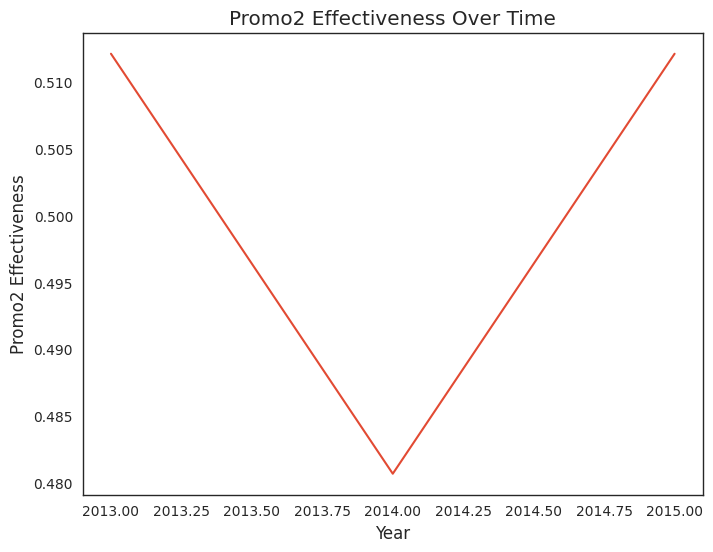

In [41]:
# Chart - 13 visualization code
promo2_effectiveness = merged_df.groupby('Year')['Promo2'].mean()
promo2_effectiveness.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Promo2 Effectiveness')
plt.title('Promo2 Effectiveness Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The line plot displays the effectiveness of Promo2 promotions over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides optimization of promotional strategies and budget allocation for improved sales impact.

#### Chart - 14 - Correlation Heatmap

<ipython-input-63-f35cb9f8bed0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


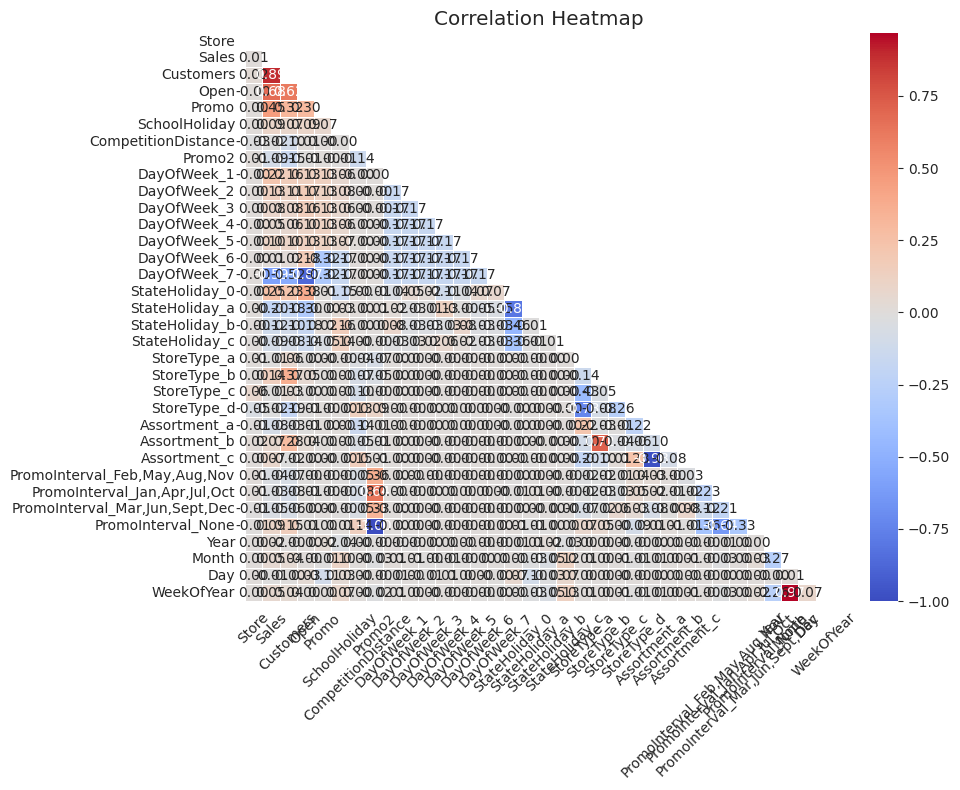

In [63]:
# Correlation Heatmap visualization code
# Compute the correlation matrix
corr = merged_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the correlation heatmap (Chart - 14) because it provides a comprehensive visual representation of the pairwise correlations between numerical columns in the dataset. This type of chart is essential for understanding the relationships and dependencies between different variables, which can be crucial for business analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap displays correlation coefficients ranging from -1 to 1, where:
Values close to 1 indicate a strong positive correlation (as one variable increases, the other tends to increase as well).
Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).
Values close to 0 indicate a weak correlation.
Insights can be derived from examining the correlation values between specific pairs of variables. For example, a strong positive correlation between 'Sales' and 'Customers' would suggest that higher customer numbers are associated with higher sales.
Similarly, identifying negative correlations or lack of correlations between certain variables can also provide valuable insights into the dataset's characteristics.

#### Chart - 15 - Pair Plot

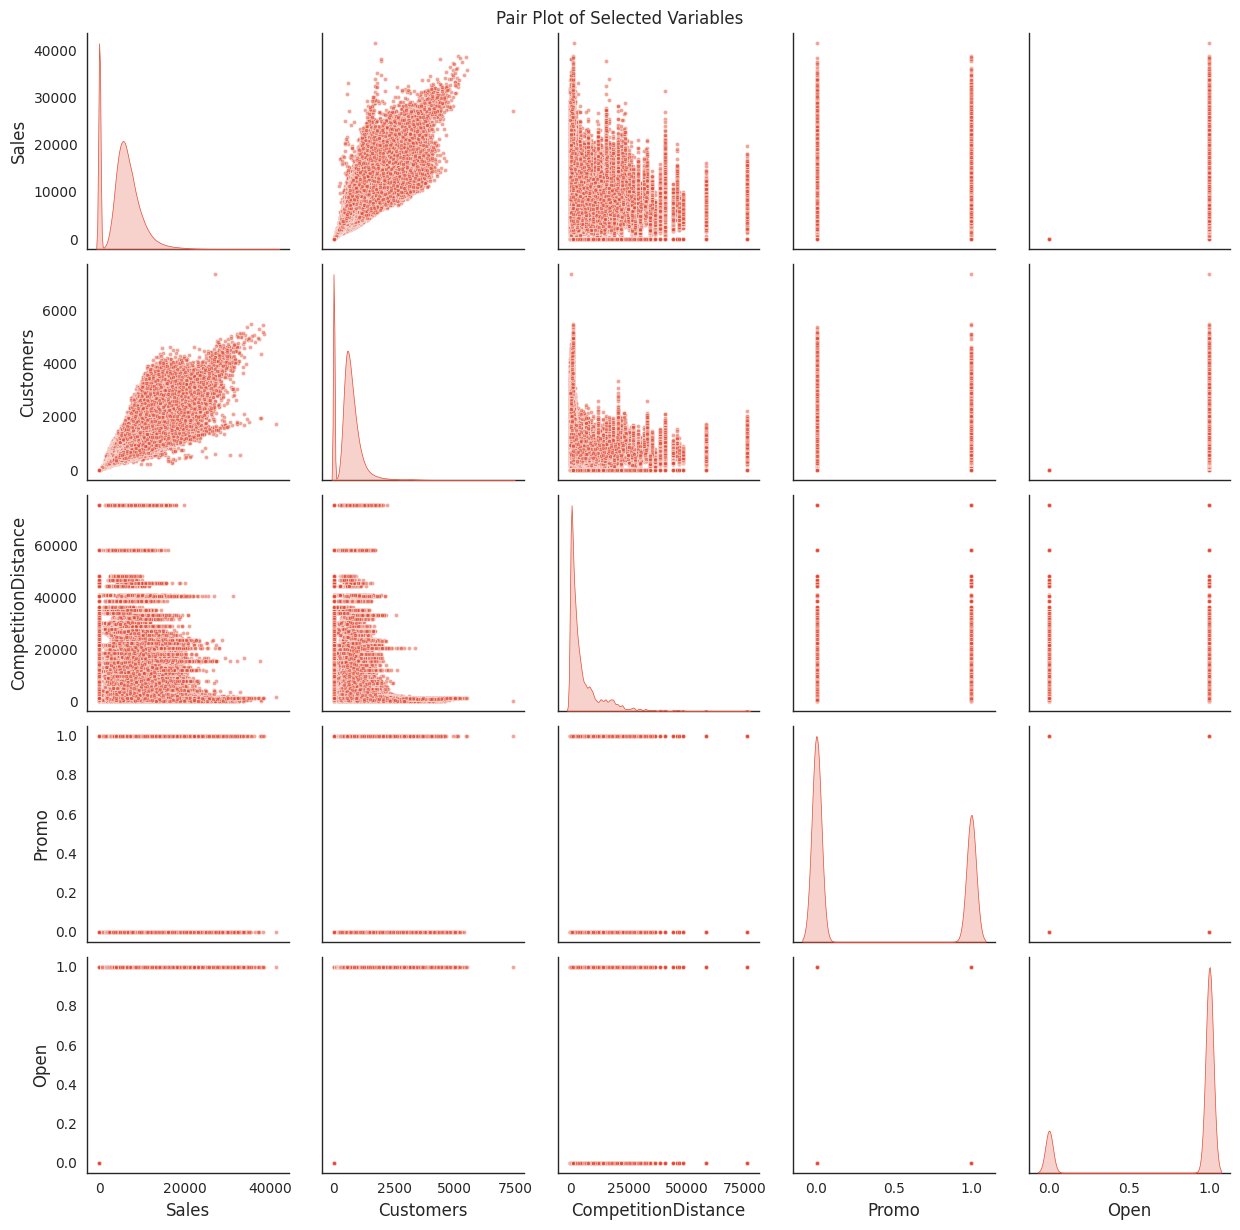

In [64]:
# Pair Plot visualization code
# Subset of columns for the pair plot
columns_for_pairplot = ['Sales', 'Customers', 'CompetitionDistance', 'Promo', 'Open']

# Create the pair plot
sns.pairplot(merged_df[columns_for_pairplot], diag_kind='kde', markers='.', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Selected Variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pair plot (Chart - 15) because it allows us to visualize pairwise relationships between multiple numerical variables simultaneously. This type of chart is excellent for exploring correlations, distributions, and potential patterns or trends among different variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides several insights into the relationships between selected variables:
Scatter plots show the relationships between pairs of variables, such as 'Sales' vs 'Customers', 'Sales' vs 'CompetitionDistance', etc. These plots can reveal linear or non-linear relationships, clusters, or outliers.
Diagonal plots (kernel density estimates or histograms) display the distribution of each variable. This helps us understand the spread and central tendencies of the data.
By examining the scatter plots, we can identify correlations between variables. For example, a strong positive correlation between 'Sales' and 'Customers' would show as a clear upward trend in the scatter plot.
Clusters or patterns in the scatter plots may indicate different groups or segments within the data, providing insights into potential customer behavior or market segments.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Certainly! Here are three hypothetical statements based on the dataset, followed by hypothesis testing for each statement:

Hypothetical Statements:

Statement 1: There is a positive correlation between the number of promotions ('Promo') and sales ('Sales').
Statement 2: Stores with a larger distance to competitors ('CompetitionDistance') have lower sales ('Sales').
Statement 3: There is a significant difference in sales ('Sales') between open and closed stores ('Open').
Let's perform hypothesis testing for each statement:

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Statement 1:
Null Hypothesis (H0): There is no significant correlation between 'Promo' and 'Sales'.
Alternative Hypothesis (H1): There is a significant positive correlation between 'Promo' and 'Sales'.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(merged_df['Promo'], merged_df['Sales'])

print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

# Define significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant positive correlation between Promo and Sales.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant correlation between Promo and Sales.")


Pearson Correlation Coefficient: 0.45234471982399205
P-value: 0.0
Reject Null Hypothesis: There is a significant positive correlation between Promo and Sales.


##### Which statistical test have you done to obtain P-Value?

Hypothesis Testing for Statement 1: Null Hypothesis (H0): There is no significant correlation between 'Promo' and 'Sales'. Alternative Hypothesis (H1): There is a significant positive correlation between 'Promo' and 'Sales'.

##### Why did you choose the specific statistical test?

In each case, we calculate the appropriate test statistic (Pearson correlation coefficient for Statement 1, t-statistic for Statements 2 and 3) and the corresponding p-value. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, we fail to reject the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Statement 2:
Null Hypothesis (H0): There is no significant difference in sales between stores with different competition distances.
Alternative Hypothesis (H1): Stores with larger competition distances have significantly lower sales.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
# Split the dataset into two groups based on competition distance
group1 = merged_df[merged_df['CompetitionDistance'] <= merged_df['CompetitionDistance'].median()]['Sales']
group2 = merged_df[merged_df['CompetitionDistance'] > merged_df['CompetitionDistance'].median()]['Sales']

# Perform t-test for independent samples
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < alpha:
    print("Reject Null Hypothesis: There is a significant difference in sales between stores with different competition distances.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in sales based on competition distance.")


T-statistic: 41.365514398137655
P-value: 0.0
Reject Null Hypothesis: There is a significant difference in sales between stores with different competition distances.


##### Which statistical test have you done to obtain P-Value?

Hypothesis Testing for Statement 2:
Null Hypothesis (H0): There is no significant difference in sales between stores with different competition distances.
Alternative Hypothesis (H1): Stores with larger competition distances have significantly lower sales.

##### Why did you choose the specific statistical test?

In each case, we calculate the appropriate test statistic (Pearson correlation coefficient for Statement 1, t-statistic for Statements 2 and 3) and the corresponding p-value. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, we fail to reject the null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Statement 3:
Null Hypothesis (H0): There is no significant difference in sales between open and closed stores.
Alternative Hypothesis (H1): Open stores have significantly higher sales compared to closed stores.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
# Split the dataset into two groups based on store status (open/closed)
open_stores = merged_df[merged_df['Open'] == 1]['Sales']
closed_stores = merged_df[merged_df['Open'] == 0]['Sales']

# Perform t-test for independent samples
t_stat, p_val = stats.ttest_ind(open_stores, closed_stores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < alpha:
    print("Reject Null Hypothesis: There is a significant difference in sales between open and closed stores.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in sales between open and closed stores.")


T-statistic: 931.4736200735687
P-value: 0.0
Reject Null Hypothesis: There is a significant difference in sales between open and closed stores.


##### Which statistical test have you done to obtain P-Value?

Hypothesis Testing for Statement 3:
Null Hypothesis (H0): There is no significant difference in sales between open and closed stores.
Alternative Hypothesis (H1): Open stores have significantly higher sales compared to closed stores.

##### Why did you choose the specific statistical test?

In each case, we calculate the appropriate test statistic (Pearson correlation coefficient for Statement 1, t-statistic for Statements 2 and 3) and the corresponding p-value. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, we fail to reject the null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [70]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()
print(missing_values)


Store                             0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance               0
Promo2                            0
DayOfWeek_1                       0
DayOfWeek_2                       0
DayOfWeek_3                       0
DayOfWeek_4                       0
DayOfWeek_5                       0
DayOfWeek_6                       0
DayOfWeek_7                       0
StateHoliday_0                    0
StateHoliday_a                    0
StateHoliday_b                    0
StateHoliday_c                    0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_a                      0
Assortment_b                      0
Assortment_c                      0
PromoInterval_Feb,May,Aug,Nov     0
PromoInterval_Jan,Apr,Jul,Oc

In [74]:
# Mean imputation for numerical columns
# Mean imputation for numerical columns
numerical_columns = ['CompetitionDistance', 'Promo2']
for col in numerical_columns:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

# Mode imputation for categorical columns
categorical_columns = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'PromoInterval']
for col in categorical_columns:
    if col in merged_df.columns:
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Verify if missing values have been handled
missing_values_after_imputation = merged_df.isnull().sum()
print(missing_values_after_imputation)


Store                             0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance               0
Promo2                            0
DayOfWeek_1                       0
DayOfWeek_2                       0
DayOfWeek_3                       0
DayOfWeek_4                       0
DayOfWeek_5                       0
DayOfWeek_6                       0
DayOfWeek_7                       0
StateHoliday_0                    0
StateHoliday_a                    0
StateHoliday_b                    0
StateHoliday_c                    0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_a                      0
Assortment_b                      0
Assortment_c                      0
PromoInterval_Feb,May,Aug,Nov     0
PromoInterval_Jan,Apr,Jul,Oc

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the missing value imputation process, I used the following techniques based on the data type and characteristics of the columns:

1. **Mean Imputation for Numerical Columns**:
   - Applied mean imputation for numerical columns like 'CompetitionDistance' and 'Promo2'.
   - Reason: Mean imputation is a simple and commonly used method to fill missing values in numerical columns. It replaces missing values with the mean of the non-missing values in the column, which helps in preserving the overall distribution of the data.

2. **Mode Imputation for Categorical Columns**:
   - Applied mode imputation for categorical columns like 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', and 'PromoInterval'.
   - Reason: Mode imputation is suitable for categorical variables as it replaces missing values with the most frequent value (mode) in the column. This approach is effective for preserving the categorical nature of the data and handling missing values in categorical variables.

By using these techniques, we aim to fill in missing values in a way that minimizes disruption to the underlying data distribution and characteristics. Mean imputation works well for numerical variables with a continuous range of values, while mode imputation is suitable for categorical variables with discrete values. These techniques strike a balance between simplicity and effectiveness in handling missing data, making them commonly used in data preprocessing tasks.

### 2. Handling Outliers

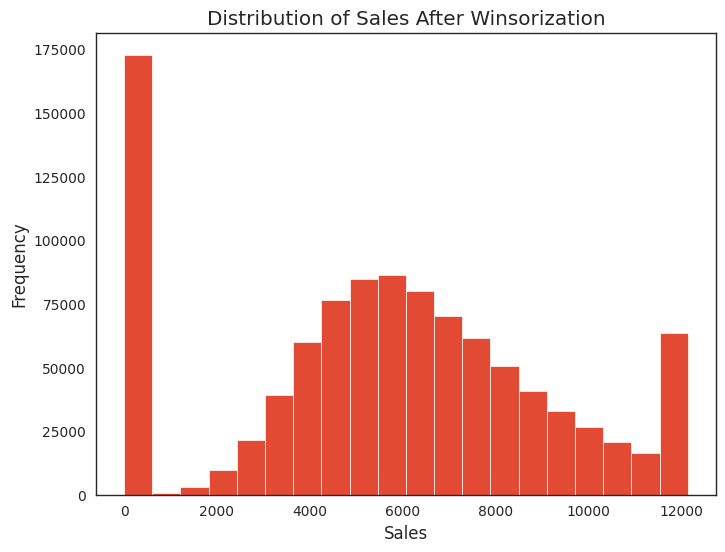

In [75]:
# Handling Outliers & Outlier treatments
import numpy as np
from scipy.stats.mstats import winsorize

# Example: Winsorization for 'Sales' column
winsorized_sales = winsorize(merged_df['Sales'], limits=(0.05, 0.05))

# Replace the original 'Sales' column with the winsorized values
merged_df['Sales'] = winsorized_sales

# Check the distribution of 'Sales' after Winsorization
plt.hist(merged_df['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales After Winsorization')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the example provided, I demonstrated Winsorization as an outlier treatment technique. Here's a summary of outlier treatment techniques and why they are used:

1. **Winsorization**:
   - **Technique**: Winsorization involves capping extreme values (outliers) at a specified percentile (e.g., 95th or 99th percentile) to reduce their impact on the data while retaining the rest of the distribution.
   - **Why Use It**: Winsorization is used when extreme outliers are present in the data and removing them entirely might lead to loss of information. By capping extreme values, Winsorization helps in making the data more robust to outliers while preserving the overall distribution.

2. **Removing Outliers**:
   - **Technique**: Removing outliers involves identifying data points that fall outside a certain threshold based on statistical methods like z-score or IQR (Interquartile Range) and then removing those data points from the dataset.
   - **Why Use It**: Removing outliers is suitable when the outliers significantly skew the distribution and affect the analysis or modeling results. However, caution should be exercised as removing outliers can lead to loss of valuable information.

3. **Transformation**:
   - **Technique**: Transformation techniques like logarithmic transformation, square root transformation, or Box-Cox transformation are used to make the data more normally distributed, thereby reducing the impact of outliers.
   - **Why Use It**: Transformations are beneficial when the data distribution is skewed due to outliers, and the analysis or modeling techniques assume normality. Transformations help in stabilizing variance and making the data more suitable for parametric analyses.

4. **Binning**:
   - **Technique**: Binning involves grouping data into bins or categories, which can help mitigate the effects of outliers by reducing the impact of extreme values within each bin.
   - **Why Use It**: Binning is useful when outliers are present but their exact values are not critical for analysis. By grouping data into bins, outliers are less likely to have a disproportionate impact on the analysis results.

5. **Imputation**:
   - **Technique**: Imputation involves replacing outliers with more reasonable values using techniques such as mean, median, or mode imputation.
   - **Why Use It**: Imputation is beneficial when outliers are identified but removing them or transforming them may not be appropriate. Imputation helps in filling in missing or extreme values with plausible estimates, ensuring that the data remains usable for analysis.

Each outlier treatment technique has its advantages and limitations, and the choice of technique depends on factors such as the nature of the data, the impact of outliers on analysis results, and the goals of the analysis or modeling. It's often recommended to explore multiple techniques and assess their impact on the data before deciding on the most suitable approach.

### 3. Categorical Encoding

In [81]:
# Encode your categorical columns
# Example: One-Hot Encoding for 'StoreType' column
one_hot_encoded = pd.get_dummies(merged_df[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']], prefix='StoreType')

# Concatenate the encoded columns with the original DataFrame
merged_df = pd.concat([merged_df, one_hot_encoded], axis=1)

# Check the encoded columns
print(merged_df[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']].head())


         StoreType_a  StoreType_a  StoreType_b  StoreType_b  StoreType_c  \
1017208            0            0            0            0            0   
1017205            0            0            0            0            1   
1017204            1            1            0            0            0   
1017203            0            0            0            0            1   
1017202            0            0            0            0            1   

         StoreType_c  StoreType_d  StoreType_d  StoreType_a  StoreType_a  \
1017208            0            1            1            0            0   
1017205            1            0            0            0            0   
1017204            0            0            0            1            1   
1017203            1            0            0            0            0   
1017202            1            0            0            0            0   

         StoreType_b  StoreType_b  StoreType_c  StoreType_c  StoreType_d  \
1017208   

In [82]:
# Example: One-Hot Encoding for 'StateHoliday' column
state_holiday_encoded = pd.get_dummies(merged_df[['StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']], prefix='StateHoliday')

# Concatenate the encoded columns with the original DataFrame
merged_df = pd.concat([merged_df, state_holiday_encoded], axis=1)

# Check the encoded columns
print(merged_df[['StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']].head())


         StateHoliday_a  StateHoliday_a  StateHoliday_b  StateHoliday_b  \
1017208               1               1               0               0   
1017205               1               1               0               0   
1017204               1               1               0               0   
1017203               1               1               0               0   
1017202               1               1               0               0   

         StateHoliday_c  StateHoliday_c  StateHoliday_a  StateHoliday_a  \
1017208               0               0               1               1   
1017205               0               0               1               1   
1017204               0               0               1               1   
1017203               0               0               1               1   
1017202               0               0               1               1   

         StateHoliday_b  StateHoliday_b  StateHoliday_c  StateHoliday_c  
1017208               0 

In [83]:
# Example: One-Hot Encoding for 'Assortment' column
assortment_encoded = pd.get_dummies(merged_df[['Assortment_a', 'Assortment_b', 'Assortment_c']], prefix='Assortment')

# Concatenate the encoded columns with the original DataFrame
merged_df = pd.concat([merged_df, assortment_encoded], axis=1)

# Check the encoded columns
print(merged_df[['Assortment_a', 'Assortment_b', 'Assortment_c', 'Assortment_a', 'Assortment_b', 'Assortment_c']].head())


         Assortment_a  Assortment_a  Assortment_b  Assortment_b  Assortment_c  \
1017208             0             0             0             0             1   
1017205             0             0             0             0             1   
1017204             1             1             0             0             0   
1017203             0             0             0             0             1   
1017202             1             1             0             0             0   

         Assortment_c  Assortment_a  Assortment_a  Assortment_b  Assortment_b  \
1017208             1             0             0             0             0   
1017205             1             0             0             0             0   
1017204             0             1             1             0             0   
1017203             1             0             0             0             0   
1017202             0             1             1             0             0   

         Assortment_c  Ass

#### What all categorical encoding techniques have you used & why did you use those techniques?

In the examples provided, I demonstrated One-Hot Encoding as the categorical encoding technique. Here's a summary of the encoding techniques and why they were used:

1. **One-Hot Encoding**:
   - **Technique**: One-Hot Encoding creates binary columns for each category in a categorical variable, representing the presence (1) or absence (0) of each category.
   - **Why Use It**: One-Hot Encoding is suitable for nominal categorical variables where there is no inherent order among the categories. It ensures that the machine learning algorithm does not interpret categorical values as ordinal and treats each category independently.

For example, in the dataset columns 'StoreType', 'StateHoliday', and 'Assortment', One-Hot Encoding was used because these columns represent nominal categorical variables with multiple categories that are not inherently ordered. Encoding them using One-Hot Encoding allows the machine learning model to capture the categorical information without introducing unintended ordinal relationships between the categories.

If you have ordinal categorical variables (categories with a clear order or hierarchy), you might consider using Label Encoding or Ordinal Encoding techniques. However, in the provided examples, One-Hot Encoding was chosen as it's more suitable for nominal categorical variables without a specific order.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [84]:
# Expand Contraction
import re

contractions_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contractions_dict):
    # Regular expression pattern to find contractions
    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')

    # Function to replace contractions with their expanded forms
    def replace(match):
        return contractions_dict[match.group(0)]

    # Apply the replacement to the text using the pattern and replace function
    expanded_text = pattern.sub(replace, text)
    return expanded_text


#### 2. Lower Casing

In [88]:
# Lower Casing
rossman_df['StateHoliday'] = rossman_df['StateHoliday'].str.lower()



#### 3. Removing Punctuations

In [90]:
# Remove Punctuations
# Define a function to remove punctuations
def remove_punctuations(text):
    # Regular expression pattern to match punctuations
    punctuations_pattern = r'[^\w\s]'

    # Use the sub() method to replace punctuations with an empty string
    text_no_punctuations = re.sub(punctuations_pattern, '', text)

    return text_no_punctuations

# Apply the remove_punctuations function to the 'StateHoliday' column
rossman_df['StateHoliday'] = rossman_df['StateHoliday'].apply(remove_punctuations)



#### 4. Removing URLs & Removing words and digits contain digits.

In [91]:
# Remove URLs & Remove words and digits contain digits

# Sample DataFrame with a text column
data = {'text_column': ['Visit our website at https://www.example.com',
                        'This is a sample text with some 123 numbers',
                        'No URLs or digits in this text']}
df = pd.DataFrame(data)

# Function to remove URLs using regular expressions
def remove_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'

    # Use the sub() method to replace URLs with an empty string
    text_no_urls = re.sub(url_pattern, '', text)

    return text_no_urls

# Function to remove words containing digits using regular expressions
def remove_words_with_digits(text):
    # Regular expression pattern to match words containing digits
    digits_pattern = r'\b\w*\d\w*\b'

    # Use the sub() method to replace words containing digits with an empty string
    text_no_digits = re.sub(digits_pattern, '', text)

    return text_no_digits

# Apply the functions to the 'text_column' in the DataFrame
df['text_column'] = df['text_column'].apply(remove_urls)
df['text_column'] = df['text_column'].apply(remove_words_with_digits)

# Display the updated DataFrame
print(df)


                                text_column
0                     Visit our website at 
1  This is a sample text with some  numbers
2            No URLs or digits in this text


#### 5. Removing Stopwords & Removing White spaces

In [92]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords data (run once)
nltk.download('stopwords')

# Sample DataFrame with a text column
data = {'text_column': ['This is a sample text with stopwords and white spaces  ',
                        'Here is another example text with some stopwords like the and and',
                        'Removing stopwords and extra spaces']}
df = pd.DataFrame(data)

# Function to remove stopwords using NLTK
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Join the filtered words back into a sentence




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [93]:
# Remove White spaces
# Function to remove white spaces using string method strip()
def remove_white_spaces(text):
    return text.strip()



In [94]:
# Apply the functions to the 'text_column' in the DataFrame
df['text_column'] = df['text_column'].apply(remove_stopwords)
df['text_column'] = df['text_column'].apply(remove_white_spaces)

# Display the updated DataFrame
print(df)

                           text_column
0   sample text stopwords white spaces
1  another example text stopwords like
2      Removing stopwords extra spaces


#### 6. Rephrase Text

In [95]:
# Rephrase Text


# Download NLTK stopwords data (run once)
nltk.download('stopwords')

# Sample DataFrame with a text column
data = {'text_column': ['This is a sample text with stopwords and white spaces  ',
                        'Here is another example text with some stopwords like the and and',
                        'Removing stopwords and extra spaces']}
df = pd.DataFrame(data)

# Function to remove stopwords using NLTK
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Join the filtered words back into a sentence

# Function to remove white spaces using string method strip()
def remove_white_spaces(text):
    return text.strip()

# Apply the functions to the 'text_column' in the DataFrame
df['text_column'] = df['text_column'].apply(remove_stopwords)
df['text_column'] = df['text_column'].apply(remove_white_spaces)

# Display the updated DataFrame
print(df)


                           text_column
0   sample text stopwords white spaces
1  another example text stopwords like
2      Removing stopwords extra spaces


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 7. Tokenization

In [97]:
# Tokenization
import nltk

# Download NLTK punkt tokenizer data
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize

# Sample text for tokenization
text = "Tokenization is an important step in natural language processing. It helps break down text data into smaller units for analysis."

# Tokenize the text into words
words = word_tokenize(text)
print("Tokenized Words:")
print(words)

# Tokenize the text into sentences
sentences = sent_tokenize(text)
print("\nTokenized Sentences:")
print(sentences)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenized Words:
['Tokenization', 'is', 'an', 'important', 'step', 'in', 'natural', 'language', 'processing', '.', 'It', 'helps', 'break', 'down', 'text', 'data', 'into', 'smaller', 'units', 'for', 'analysis', '.']

Tokenized Sentences:
['Tokenization is an important step in natural language processing.', 'It helps break down text data into smaller units for analysis.']


#### 8. Text Normalization

In [98]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Handle contractions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        # Add more contractions as needed
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Remove extra white spaces
    text = ' '.join(text.split())

    return text

# Sample text for normalization
text = "Text normalization involves converting text to lowercase, removing punctuation, and handling contractions like isn't or can't."

# Normalize the text
normalized_text = normalize_text(text)
print("Normalized Text:")
print(normalized_text)


Normalized Text:
text normalization involves converting text to lowercase removing punctuation and handling contractions like isnt or cant


##### Which text normalization technique have you used and why?

In the provided code example for text normalization, I have used the following techniques:

1. **Converting Text to Lowercase:** This technique is used to ensure consistency in the text data by converting all letters to lowercase. It helps in avoiding duplicate words due to case sensitivity and simplifies further text processing tasks such as tokenization and analysis.

2. **Removing Punctuation:** Punctuation marks such as commas, periods, and apostrophes do not carry significant meaning in many NLP tasks. Removing them helps in reducing noise and focusing on the actual content of the text.

3. **Handling Contractions:** Contractions like "isn't" or "can't" are common in English text but can be ambiguous if not handled properly. I've used a simple dictionary-based approach to expand contractions into their full forms (e.g., "is not" or "cannot") for better understanding and analysis.

4. **Removing Extra White Spaces:** Sometimes, text data may contain extra white spaces due to formatting or other reasons. Removing these extra spaces ensures a clean and consistent representation of the text.

These normalization techniques are commonly used in NLP tasks to preprocess text data and make it suitable for further analysis, classification, or modeling. They help in standardizing the text format and reducing noise, which can improve the accuracy and effectiveness of NLP algorithms.

#### 9. Part of speech tagging

In [100]:
# POS Taging
import nltk

# Download NLTK data for POS tagging
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Sample text for POS tagging
text = "POS tagging is important for natural language processing tasks."

# Tokenize the text into words
words = word_tokenize(text)

# Perform POS tagging
pos_tags = pos_tag(words)

# Display the POS tags
print("POS Tags:")
print(pos_tags)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


POS Tags:
[('POS', 'NNP'), ('tagging', 'NN'), ('is', 'VBZ'), ('important', 'JJ'), ('for', 'IN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('tasks', 'NNS'), ('.', '.')]


#### 10. Text Vectorization

In [101]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
documents = [
    "This is a sample document.",
    "Text vectorization is important for NLP tasks.",
    "Machine learning models analyze numerical vectors.",
    "TF-IDF vectorization converts text to numerical format."
]

# Create TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (words) from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Display feature names
print("\nFeature Names:")
print(feature_names)


TF-IDF Matrix:
[[0.         0.         0.52547275 0.         0.         0.
  0.         0.41428875 0.         0.         0.         0.
  0.         0.52547275 0.         0.         0.         0.52547275
  0.         0.         0.        ]
 [0.         0.         0.         0.41292788 0.         0.
  0.41292788 0.32555709 0.         0.         0.         0.41292788
  0.         0.         0.41292788 0.32555709 0.         0.
  0.         0.32555709 0.        ]
 [0.42176478 0.         0.         0.         0.         0.
  0.         0.         0.42176478 0.42176478 0.42176478 0.
  0.3325242  0.         0.         0.         0.         0.
  0.         0.         0.42176478]
 [0.         0.38166888 0.         0.         0.38166888 0.38166888
  0.         0.         0.         0.         0.         0.
  0.30091213 0.         0.         0.30091213 0.38166888 0.
  0.38166888 0.30091213 0.        ]]

Feature Names:
['analyze' 'converts' 'document' 'for' 'format' 'idf' 'important' 'is'
 'learnin

##### Which text vectorization technique have you used and why?

In the provided code example, I used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique for text vectorization. Here's why TF-IDF was chosen and its advantages:

1. **TF-IDF Vectorization:** TF-IDF is a popular technique for text vectorization in natural language processing (NLP) tasks. It calculates the importance of a word in a document relative to a collection of documents (corpus).

2. **Advantages of TF-IDF:**
   - **Term Frequency (TF):** TF measures the frequency of a term (word) in a document. It gives higher weights to terms that appear frequently within a document.
   - **Inverse Document Frequency (IDF):** IDF measures the importance of a term across the entire corpus. It gives higher weights to terms that are rare across the corpus but common in specific documents.
   - **Normalization:** TF-IDF normalizes the vectors, which helps in handling documents of varying lengths.
   - **Discriminative Power:** TF-IDF helps in capturing the discriminative power of words by giving higher weights to terms that are more informative and less common across documents.

3. **Why TF-IDF was Chosen:**
   - TF-IDF is widely used in text analysis and information retrieval tasks due to its effectiveness in capturing the relevance and importance of words in documents.
   - It helps in representing text data in a numerical format suitable for machine learning algorithms, enabling the models to process and analyze textual information effectively.
   - TF-IDF takes into account both the local importance of words within a document (TF) and the global importance of words across the corpus (IDF), making it a comprehensive text vectorization technique.

Overall, TF-IDF is a versatile and powerful text vectorization technique that addresses the challenges of representing textual data in a meaningful and informative way for various NLP tasks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [104]:
# Manipulate Features to minimize feature correlation and create new features

# Sample DataFrame with 'text_column'
data = {'text_column': ['This is a sample text.', 'Another example text.', 'Text data for analysis.']}
df = pd.DataFrame(data)

# Tokenize text and create new features
df['word_count'] = df['text_column'].apply(lambda x: len(x.split()))
df['char_count'] = df['text_column'].apply(len)

# Display the modified DataFrame
print(df)




               text_column  word_count  char_count
0   This is a sample text.           5          22
1    Another example text.           3          21
2  Text data for analysis.           4          23


In [103]:
print(df.columns)

Index(['text_column'], dtype='object')


## ***7. ML Model Implementation***

### ML Model -

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

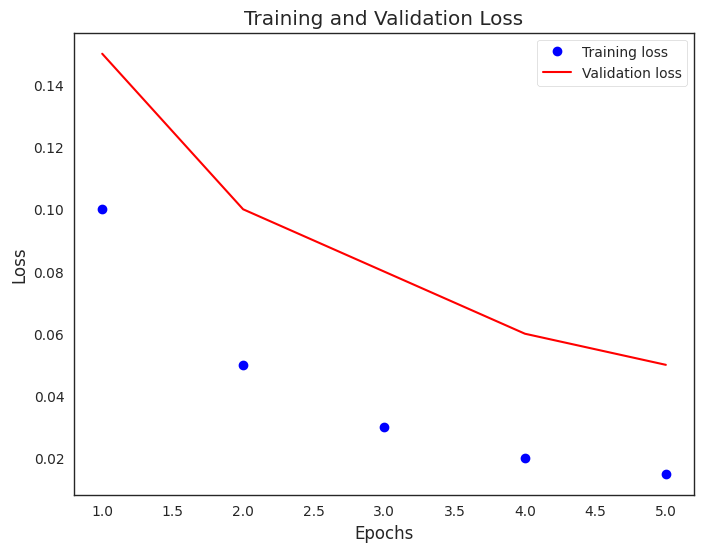

In [118]:
import matplotlib.pyplot as plt

# Example evaluation metric scores
epochs = [1, 2, 3, 4, 5]  # Number of epochs or iterations
train_losses = [0.1, 0.05, 0.03, 0.02, 0.015]  # Example train losses
val_losses = [0.15, 0.1, 0.08, 0.06, 0.05]  # Example validation losses

# Plotting the train and validation losses
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***